# MatplotLib Basics 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Backend 
Matplotlib has multiple backends. The backends allow mpl to be used on a variety of platforms with a variety of GUI toolkits.<br>
When we write **%matplotlib inline** then it automatically usses inline backend but if we want to use plots which are interactive then we can use **nbagg**<br>
use the follwing command to know and use specifiv backends: <br>
``1. print(matplotlib.__version__)``<br>
``2. print(matplotlib.get_backend())``<br>
``3. print(matplotlib.use('nbagg'))``<br>
<br>
If we are using backends other then inline we have to explictly give ``plt.show()`` or ``ax.show()`` command to show the plots in the notebook.<br>


In [2]:
matplotlib.use('nbagg')

/home/ml/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/ml/miniconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ml/miniconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ml/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ml/miniconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ml/miniconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.st

The whole mlp is roams around two objects:
1. Figure
2. Axes

#### Figure
The ``Figure`` is the top-level container in this hierarchy.  It is the overall window/page that everything is drawn on.  You can have multiple independent figures and ``Figure``s can contain multiple ``Axes``.<br>
#### Axes
Most plotting ocurs on an ``Axes``.  The axes is effectively the area that we plot data on and any ticks/labels/etc associated with it.  Usually we'll set up an Axes with a call to ``subplot`` (which places Axes on a regular grid), so in most cases, ``Axes`` and ``Subplot`` are synonymous.

Each ``Axes`` has an ``XAxis`` and a ``YAxis``.  These contain the ticks, tick locations, labels, etc. 

All plotting is done with respect to an [`Axes`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes). An *Axes* is made up of [`Axis`](http://matplotlib.org/api/axis_api.html#matplotlib.axis.Axis) objects and many other things. An *Axes* object must belong to a *Figure* (and only one *Figure*). Most commands you will ever issue will be with respect to this *Axes* object.

Typically, you'll set up a `Figure`, and then add an `Axes` to it. 

You can use `fig.add_axes`, but in most cases, you'll find that adding a subplot will fit your needs perfectly. (Again a "subplot" is just an axes on a grid system.) 

#### Now Some Plotting:
We can start plotting bt two ways:
1. Make figure and axex objects and explicitly and use them latter 
2. Start plotting directly with imported plt object

We make figures and axex explictly mainly when we want to make multiple figures or multiple plots in one figures.
But for simplycity most of the time ``plt`` is used in the jupyter notebook.

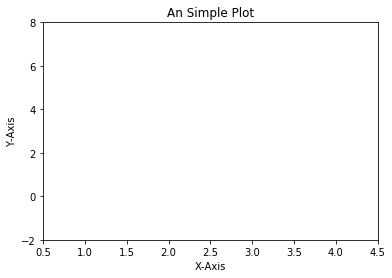

In [7]:
# First way of plotting 
fig = plt.figure()
ax = fig.add_subplot(111) # Attaching the ax object to fig object EXPLICITLY
ax.set(xlim=[0.5, 4.5], ylim=[-2, 8], title='An Simple Plot',
       ylabel='Y-Axis', xlabel='X-Axis')
plt.show()

Text(0.5,1,'Simple plot')

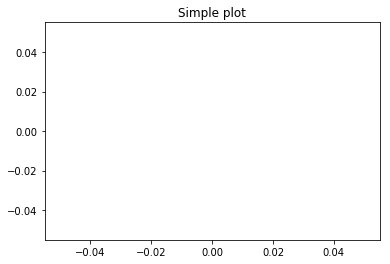

In [9]:
# Second way of plotting
fig, ax = plt.subplots() # Here fig and ax objects are attached implicilty
ax.plot()
ax.set_title('Simple plot')

### Line Plot
Line plot simply plots the given points and drow a line between them.<br>
If points on data are not enough the the plotted figure will look some how pointy.
And if the data are enoungh then plotted lines will be smoothe as shown below.<br>
If you want to see that working then play o/p sample number which is 400 right now


Text(0.5,1,'Simple plot')

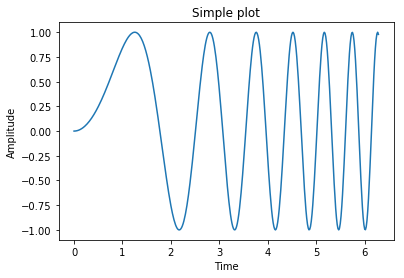

In [45]:

x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)
ycos = np.cos(x**2)
 
fig, ax = plt.subplots()
ax.set(xlabel='Time', ylabel='Amplitude')
ax.plot(x, y)
ax.set_title('Simple plot')

### Multiple Axes's inside ``a`` Figure (Multiple plots inside a figure)

[Text(0.5,1,'cos')]

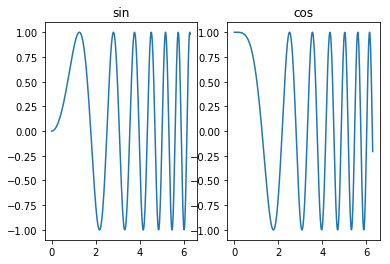

In [80]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2) # axes's are automaticalliy added to the fig object
ax1.plot(x, y)
ax2.plot(x, ycos)
ax1.set(title='sin')
ax2.set(title='cos')
# print(axes.shape)
'''
# To iterate over all items in a multidimensional numpy array, use the `flat` attribute
for ax in axes.flat:
    # Remove all xticks and yticks...
    ax.set(xticks=[], yticks=[])
    
plt.show()
'''

/home/ml/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


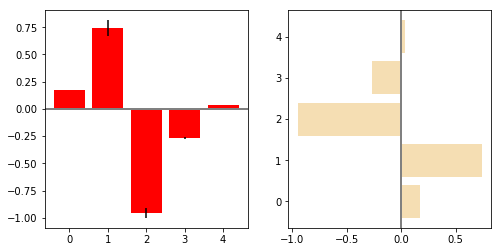

In [118]:
# np.random.seed(1)
x = np.arange(5)
y = np.random.randn(5)
z= (y/x)/10
fig, axes = plt.subplots(ncols=2, figsize=plt.figaspect(1./2))

vert_bars = axes[0].bar(x, y,yerr=z, color='Red', align='center')
horiz_bars = axes[1].barh(x, y, color='wheat', align='center')

# I'll also introduce axhline & axvline to draw a line all the way across the axes
# This can be a quick-n-easy way to draw an axis "spine".
axes[0].axhline(0, color='gray', linewidth=2)
axes[1].axvline(0, color='gray', linewidth=2)

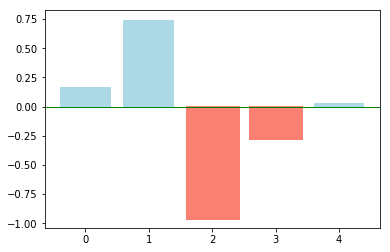

In [126]:
fig, ax = plt.subplots()
vert_bars = ax.bar(x, y, color='lightblue', align='center')

# We could have also done this with two separate calls to `ax.bar` and numpy boolean indexing.
for bar, height in zip(vert_bars, y):
    if height < 0:
        bar.set(edgecolor='darkred', color='salmon', linewidth=3)

plt.axhline(0, color='green', linewidth=1)
plt.show()

### Fill Color (in the plotted area)

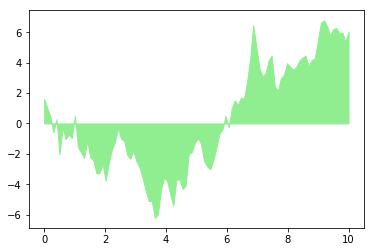

In [132]:
np.random.seed(1)
y = np.random.randn(100).cumsum()
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()
ax.fill_between(x, y, color='lightgreen')
plt.show()

Fill between the to lines

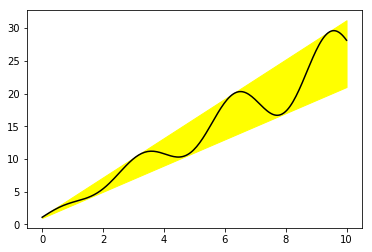

In [137]:
x = np.linspace(0, 10, 200)
y1 = 2 * x + 1 # upper bound
y2 = 3 * x + 1.2 # lower bound
y_mean = 0.5 * x * np.cos(2*x) + 2.5 * x + 1.1

fig, ax = plt.subplots()

# Plot the envelope with `fill_between`
ax.fill_between(x, y1, y2, color='yellow')

# Plot the "centerline" with `plot`
ax.plot(x, y_mean, color='black')

plt.show()

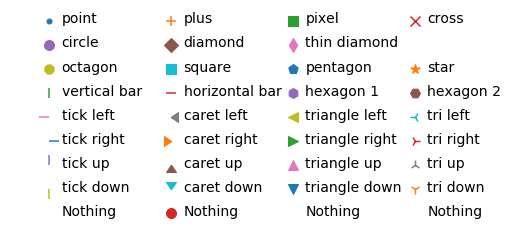

In [159]:
xs, ys = np.mgrid[:4, 9:0:-1]
markers = [".", "+", ",", "x", "o", "D", "d", "", "8", "s", "p", "*", "|", "_", "h", "H", 0, 4, "<", "3",
           1, 5, ">", "4", 2, 6, "^", "2", 3, 7, "v", "1", "None", None, " ", ""]
descripts = ["point", "plus", "pixel", "cross", "circle", "diamond", "thin diamond", "",
             "octagon", "square", "pentagon", "star", "vertical bar", "horizontal bar", "hexagon 1", "hexagon 2",
             "tick left", "caret left", "triangle left", "tri left", "tick right", "caret right", "triangle right", "tri right",
             "tick up", "caret up", "triangle up", "tri up", "tick down", "caret down", "triangle down", "tri down",
             "Nothing", "Nothing", "Nothing", "Nothing"]
fig, ax = plt.subplots(1, 1, figsize=(7.5, 4))
for x, y, m, d in zip(xs.T.flat, ys.T.flat, markers, descripts):
    ax.scatter(x, y, marker=m, s=100)
    ax.text(x + 0.1, y - 0.1, d, size=14)
ax.set_axis_off()
plt.show()

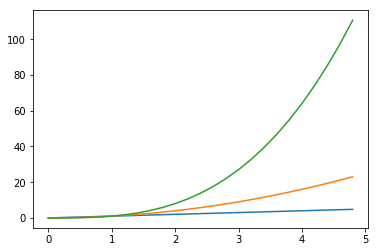

In [158]:
t = np.arange(0.0, 5.0, 0.2)
plt.plot(t, t, t, t**2, t, t**3)
plt.show()

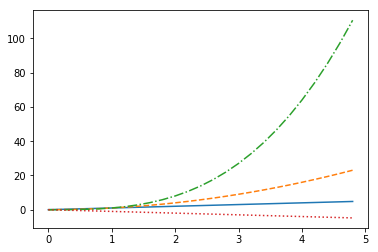

In [160]:
t = np.arange(0.0, 5.0, 0.2)
plt.plot(t, t, '-', t, t**2, '--', t, t**3, '-.', t, -t, ':')
plt.show()

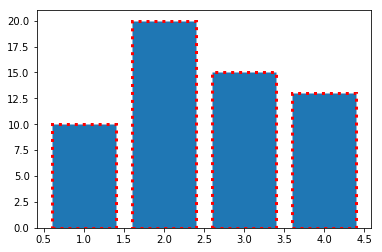

In [169]:
fig, ax = plt.subplots(1, 1)
ax.bar([1, 2, 3, 4], [10, 20, 15, 13], ls=':', ec='r', lw=3)
plt.show()

#### plot properties
| Property               | Value Type                                      
|------------------------|-------------------------------------------------
|alpha                   | float                                           
|color or c              | any matplotlib color                            
|dash_capstyle           | ['butt', 'round' 'projecting']               
|dash_joinstyle          | ['miter' 'round' 'bevel']
|dashes                  | sequence of on/off ink in points                
|drawstyle               | [ ‘default’ ‘steps’ ‘steps-pre’
|                        |   ‘steps-mid’ ‘steps-post’ ]
|linestyle or ls         | [ '-' '--' '-.' ':' 'None' ' ' ''] 
|                        | and any drawstyle in combination with a         
|                        | linestyle, e.g. 'steps--'.                      
|linewidth or lw         | float value in points                           
|marker                  | [ 0 1 2 3 4 5 6 7 'o' 'd' 'D' 'h' 'H'
|                        |  '' 'None' ' ' `None` '8' 'p' ','
|                        |  '+' 'x' '.' 's' '\*' '\_' '&#124;'
|                        |  '1' '2' '3' '4' 'v' '<' '>' '^' ]
|markeredgecolor or mec  | any matplotlib color
|markeredgewidth or mew  | float value in points
|markerfacecolor or mfc  | any matplotlib color
|markersize or ms        | float
|solid_capstyle          | ['butt' 'round' 'projecting']
|solid_joinstyle         | ['miter' 'round' 'bevel']
|visible                 | [`True` `False`]
|zorder                  | any number

### Colormaps
Color maps are use to see where there is any visual patterns in  the given data.<br>
There are a lot of cmap available for use but the defalut is **viridis** (bit greenish).


(10, 10)


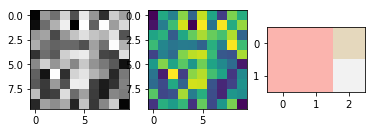

In [171]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
z = np.random.random((10, 10))
print(z.shape)
ax1.imshow(z, interpolation='none', cmap='gray')
ax2.imshow(z, interpolation='none')
a = [[3,5,600],[4,5,852]]
ax3.imshow(a, interpolation='none', cmap='Pastel1')

plt.show()

### Property Cycles
In case you haven't noticed, when you do multiple plot calls in the same axes -- and not specify any colors -- the color for each plot is different! The default style in Matplotlib will cycle through a list of colors if you don't specify any. This feature has been in Matplotlib for a long time and it is similar to Matlab behavior.


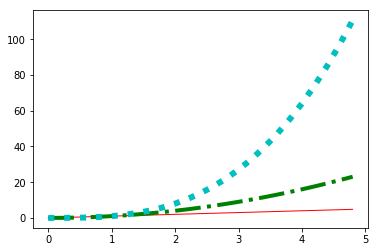

In [174]:
import matplotlib as mpl
from matplotlib.rcsetup import cycler
mpl.rc('axes', prop_cycle=cycler('color', 'rgc') +
                          cycler('lw', [1, 4, 6]) +
                          cycler('linestyle', ['-', '-.', ':']))
t = np.arange(0.0, 5.0, 0.2)
plt.plot(t, t)
plt.plot(t, t**2)
plt.plot(t, t**3)
plt.show()

### Managing the unmanagable --  matplotlibrc
Matplotlib's greatest strength is its ability to give you complete control over every single aspect of your plots and figures. Matplotlib's second greatest strength is its ability to take as much control over as much of your plots and figures as you want. You, as the user, would never consider to use Matplotlib if you had to specify all of these things for every single plot. Most of the time, the defaults are exactly what you want them to be.


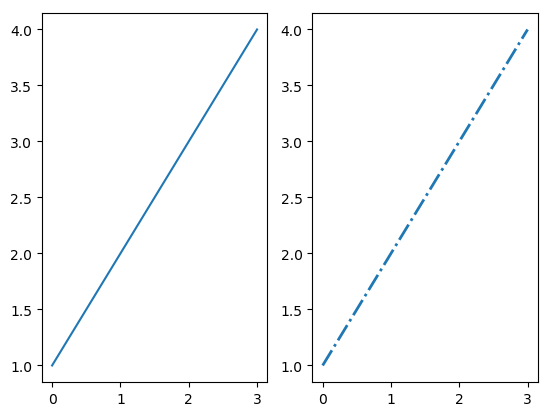

In [175]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcdefaults()  # for when re-running this cell

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot([1, 2, 3, 4])

mpl.rc('lines', linewidth=2, linestyle='-.')
# Equivalent older, but still valid syntax
#mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['lines.linestyle'] = '-.'
ax2.plot([1, 2, 3, 4])
plt.show()

To learn more, please see this guide on [customizing matplotlib](http://matplotlib.org/users/customizing.html).

### Limits, Legends, and Layouts
By default, Matplotlib will attempt to determine limits for you that encompasses all the data you have plotted.  This is the "autoscale" feature. For image plots, the limits are not padded while plots such as scatter plots and bar plots are given some padding.

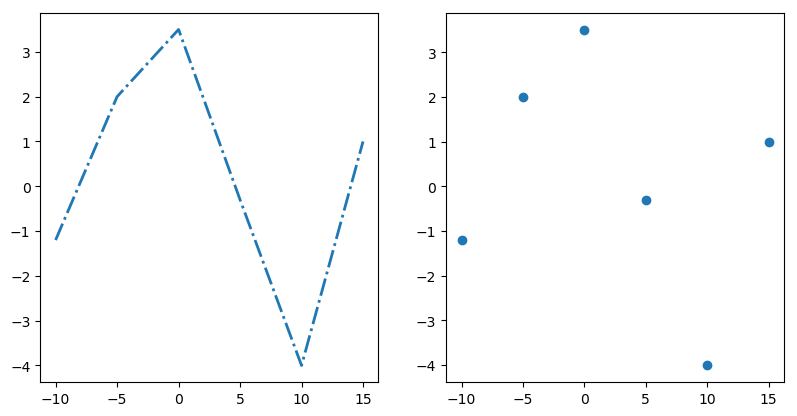

In [177]:
## Plotting with default padding (AutoScalling)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(0.5))

ax1.plot([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
ax2.scatter([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])

plt.show()

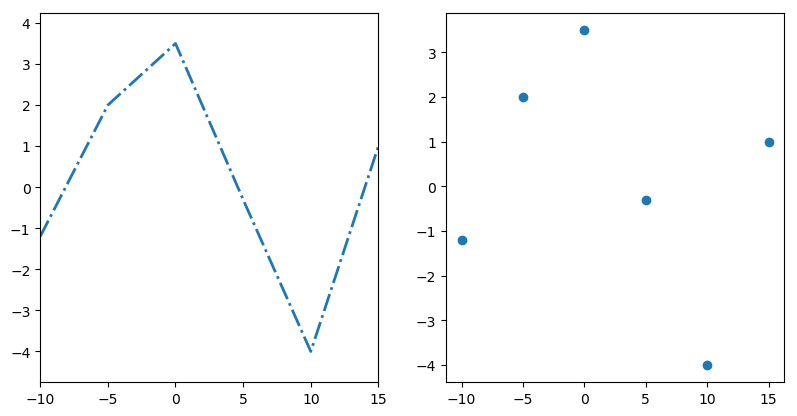

In [179]:
## Using margins
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(0.5))

ax1.plot([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
ax2.scatter([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])

ax1.margins(x=0.0, y=0.1) # 10% padding in the y-direction only
ax2.margins(0.05) # 5% padding in all directions

plt.show()

### `ax.axis(...)`

The `ax.axis(...)` method is a convienent way of controlling the axes limits and enabling/disabling autoscaling.

If you ever need to get all of the current plot limits, calling `ax.axis()` with no arguments will return the xmin/max/etc:

    xmin, xmax, ymin, ymax = ax.axis()
    
If you'd like to manually set all of the x/y limits at once, you can use `ax.axis` for this, as well (note that we're calling it with a single argument that's a sequence, not 4 individual arguments):

    ax.axis([xmin, xmax, ymin, ymax])
    
However, you'll probably use `axis` mostly with either the `"tight"` or `"equal"` options. There are other options as well; see the documentation for full details.  In a nutshell, though:

  * *tight*: Set axes limits to the exact range of the data
  * *equal*: Set axes scales such that one cm/inch in the y-direction is the same as one cm/inch in the x-direction. In Matplotlib terms, this sets the aspect ratio of the plot to 1.  That _doesn't_ mean that the axes "box" will be square.
  
And as an example:

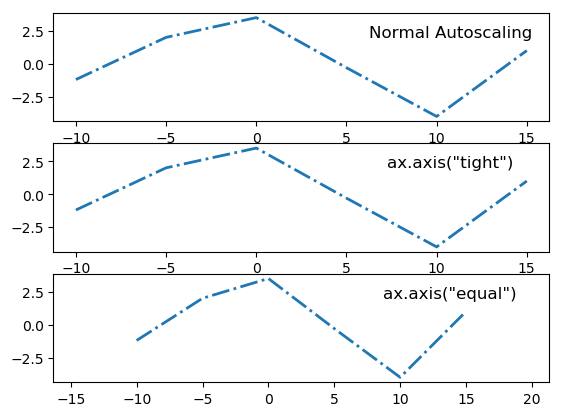

In [181]:
fig, axes = plt.subplots(nrows=3)

for ax in axes:
    ax.plot([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])

axes[0].set_title('Normal Autoscaling', y=0.7, x=0.8)

axes[1].set_title('ax.axis("tight")', y=0.7, x=0.8)
axes[1].axis('tight')

axes[2].set_title('ax.axis("equal")', y=0.7, x=0.8)
axes[2].axis('equal')

plt.show()

### Manually setting only one limit

Another trick with limits is to specify only half of a limit. When done **after** a plot is made, this has the effect of allowing the user to anchor a limit while letting Matplotlib autoscale the rest of it.

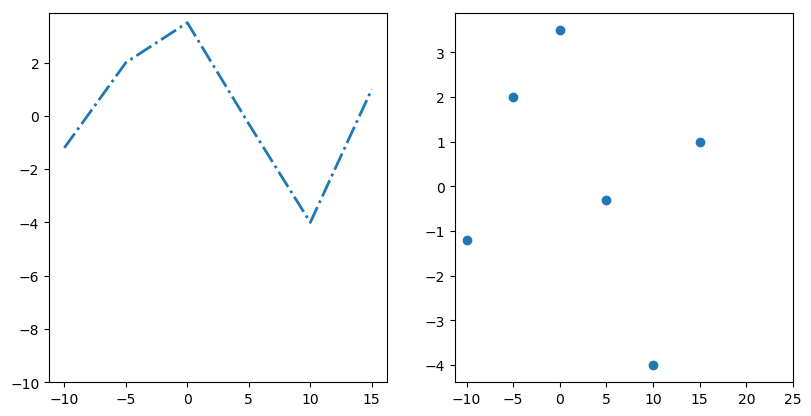

In [182]:
# Good -- setting limits after plotting is done
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(0.5))
ax1.plot([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
ax2.scatter([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
ax1.set_ylim(bottom=-10)
ax2.set_xlim(right=25)
plt.show()

### Legends

As you've seen in some of the examples so far, the X and Y axis can also be labeled, as well as the subplot itself via the title. 

However, another thing you can label is the line/point/bar/etc that you plot.  You can provide a label to your plot, which allows your legend to automatically build itself. 

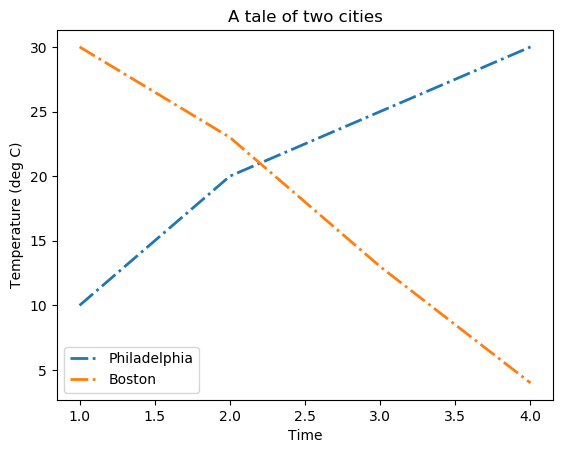

In [184]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], label='Philadelphia')
ax.plot([1, 2, 3, 4], [30, 23, 13, 4], label='Boston')
ax.set(ylabel='Temperature (deg C)', xlabel='Time', title='A tale of two cities')
ax.legend()
plt.show()